## Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\Mina\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.model_selection import train_test_split, validation_curve,GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Loading DF

In [4]:
df = pd.read_csv(r'd:\Programacion\Datasets\heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Invalid Values

In [6]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts(),end='\n\n')

M    725
F    193
Name: Sex, dtype: int64

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



### Missing Values

In [7]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# EDA

## Age

Text(0.5, 0, 'Problemas del corazon')

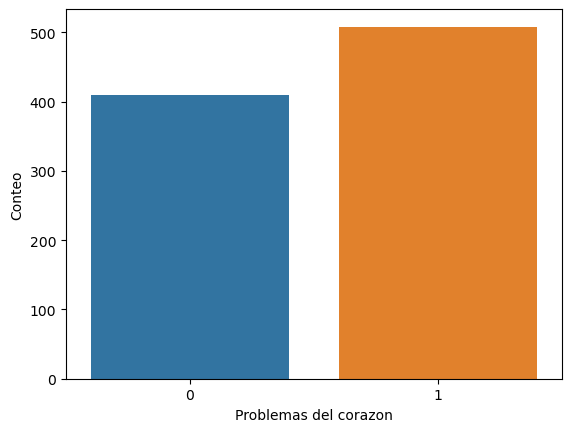

In [8]:
sns.countplot(x = df.HeartDisease)
plt.ylabel('Conteo')
plt.xlabel('Problemas del corazon')

In [9]:
print(f'Min age: {df.Age.min()}\nMin age with heart disease: {df.loc[df.HeartDisease==1,"Age"].min()}\nMax age: {df.Age.max()}\nEdad promedio: {df.Age.mean()}')

Min age: 28
Min age with heart disease: 31
Max age: 77
Edad promedio: 53.510893246187365


Text(0, 0.5, 'Conteo')

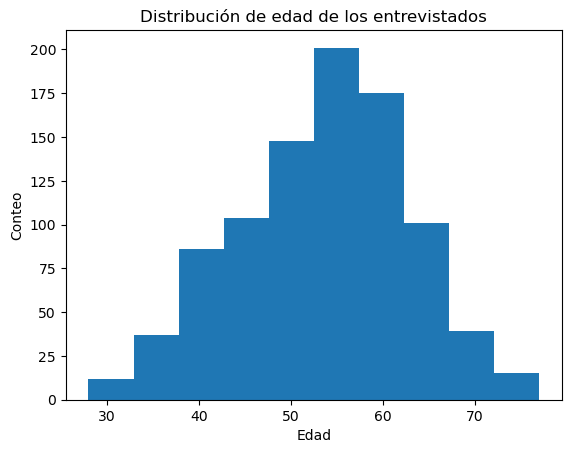

In [10]:
plt.hist(data=df,x='Age')
plt.title('Distribución de edad de los entrevistados')
plt.xlabel('Edad')
plt.ylabel('Conteo')
#plt.grid()

Text(0, 0.5, 'Conteo')

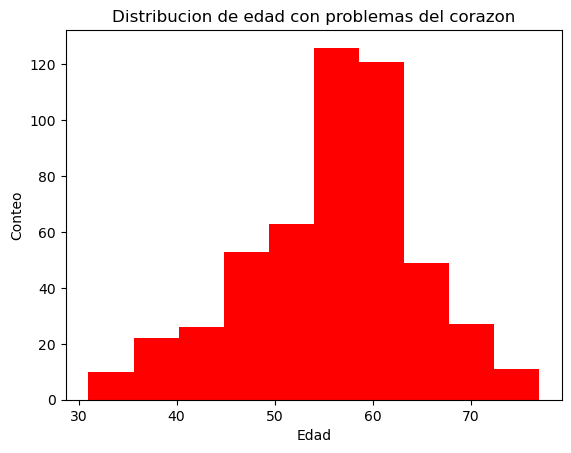

In [11]:
plt.hist(df.loc[df.HeartDisease==1]['Age'],color='r')
plt.title('Distribucion de edad con problemas del corazon')
plt.xlabel('Edad')
plt.ylabel('Conteo')

## Genre

<Axes: title={'center': 'Problema del corazon por sexo'}, xlabel='Sexo', ylabel='Conteo'>

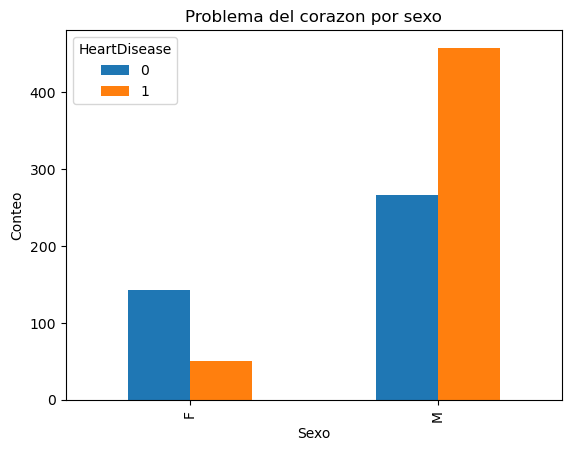

In [12]:
df.groupby('Sex')['HeartDisease'].value_counts().unstack().plot(kind='bar',
                                                                title='Problema del corazon por sexo',
                                                                ylabel='Conteo',
                                                                xlabel='Sexo')                                                       

## Colesterol

In [5]:
labels=['Deseable','Casi Alto','Alto']
bins=[0,200,240,float('inf')]
df['ColesterolCategory'] = pd.cut(df.Cholesterol,bins=bins,labels=labels)

<Axes: title={'center': 'Agrupado por nivel de colesterol'}, xlabel='Problemas del Corazon', ylabel='Numero de personas'>

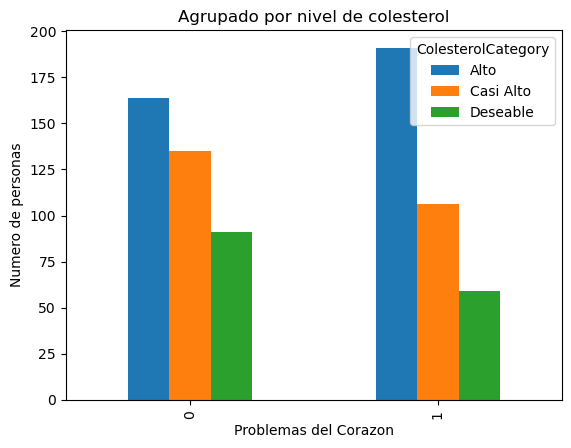

In [17]:
df.groupby('HeartDisease')['ColesterolCategory'].value_counts().unstack().plot(kind='bar',
                                                                              title='Agrupado por nivel de colesterol',
                                                                              xlabel='Problemas del Corazon',
                                                                              ylabel='Numero de personas')

# Featuring Engineer

In [18]:
df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12244\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [6]:
dfc = df.copy()
cat_cols = dfc.select_dtypes(include='object').columns.tolist()
tiza = pd.concat([dfc.drop(columns=cat_cols),pd.get_dummies(dfc[cat_cols])],axis=1)

# ML

In [7]:
X = tiza.drop(['ColesterolCategory','HeartDisease'],axis=1)
y = df.HeartDisease
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### LinearSVC

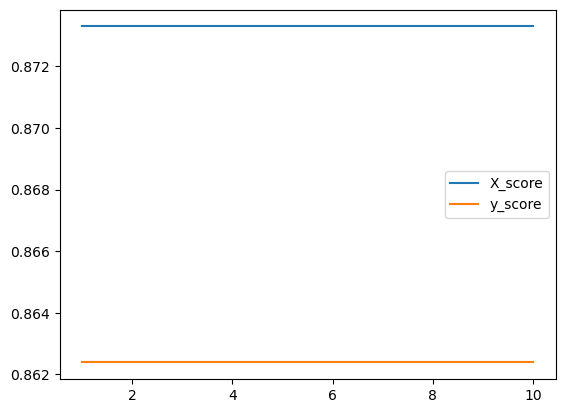

In [10]:
#LinearSVC
from sklearn.svm import LinearSVC
rango=range(1,11)
X_score,y_score = validation_curve(LinearSVC(dual=False),X_train_std,y_train,param_name='C',param_range=rango)
X_score,y_score = [np.mean(x) for x in X_score], [np.mean(y) for y in y_score]
plt.plot(rango,X_score,label='X_score')
plt.plot(rango,y_score,label='y_score')
plt.legend()

In [11]:
lsvc = LinearSVC(C=9,dual=False)
lsvc.fit(X_train_std,y_train)
y_pred = lsvc.predict(X_test_std)

In [12]:
print(f'Precision: {metrics.precision_score(y_test,y_pred)}\nAccuracy: {metrics.accuracy_score(y_test,y_pred)}\nRecall: {metrics.recall_score(y_test,y_pred)}\nF1_score: {metrics.f1_score(y_test,y_pred)}')

Precision: 0.9
Accuracy: 0.8532608695652174
Recall: 0.8411214953271028
F1_score: 0.8695652173913043


### RandomForest

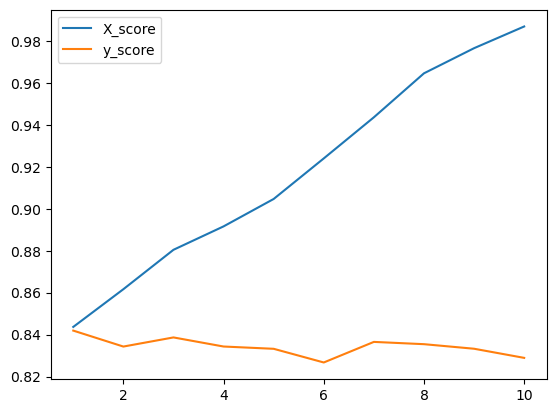

In [73]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rango=range(1,11)
X_score,y_score = validation_curve(RandomForestClassifier(),X,y,param_name='max_depth',param_range=rango)
X_score,y_score = [np.mean(x) for x in X_score], [np.mean(y) for y in y_score]

plt.plot(rango,X_score,label='X_score')
plt.plot(rango,y_score,label='y_score')
plt.legend()

In [75]:
grid = {'n_estimators':[50,80,100],'max_depth':rango}
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid)
gs.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': [50, 80, 100]})

In [79]:
gs.best_params_, gs.best_score_

({'max_depth': 4, 'n_estimators': 80}, 0.840864813494892)

In [82]:
rf = RandomForestClassifier(n_estimators=80,max_depth=4)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [70]:
print(f'Precision: {metrics.precision_score(y_test,y_pred)}\nAccuracy: {metrics.accuracy_score(y_test,y_pred)}\nRecall: {metrics.recall_score(y_test,y_pred)}\nF1_score: {metrics.f1_score(y_test,y_pred)}')

Precision: 0.8508771929824561
Accuracy: 0.8532608695652174
Recall: 0.9065420560747663
F1_score: 0.8778280542986425


### XGBClassifier

In [19]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 581.0 kB/s eta 0:02:52
   ---------------------------------------- 0.2/99.8 MB 980.4 kB/s eta 0:01:42
   ---------------------------------------- 0.3/99.8 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.5/99.8 MB 1.7 MB/s eta 0:00:57
   ---------------------------------------- 0.7/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.9/99.8 MB 2.5 MB/s eta 0:00:41
   -------------------------------------

In [20]:
#XGBClassifier
from xgboost import XGBClassifier
grid = {'n_estimators':[70],'max_depth':[2],'learning_rate': [0.1],'subsample': [0.3],'reg_lambda':[0,2,3,4,5,6,7,8]}
gs = GridSearchCV(XGBClassifier(),param_grid=grid,scoring='f1')
gs.fit(X,y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [2],
                         'n_estimators': [70],
                         'reg_lambda': [0, 2, 3, 4, 5, 6, 7, 8],
                         'subsample': [0.3]},
             scoring='f1')

In [21]:
gs.best_params_, gs.best_score_

({'learning_rate': 0.1,
  'max_depth': 2,
  'n_estimators': 70,
  'reg_lambda': 4,
  'subsample': 0.3},
 0.8538684501851481)

In [86]:
xgb = XGBClassifier(n_estimators=77,max_depth=4,learning_rate=0.08656787789095563,subsample=0.7558079331519831)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [83]:
print(f'Precision: {metrics.precision_score(y_test,y_pred)}\nAccuracy: {metrics.accuracy_score(y_test,y_pred)}\nRecall: {metrics.recall_score(y_test,y_pred)}\nF1_score: {metrics.f1_score(y_test,y_pred)}')

Precision: 0.9047619047619048
Accuracy: 0.8804347826086957
Recall: 0.8878504672897196
F1_score: 0.8962264150943396


In [87]:
y_pred = xgb.predict(X_test)

In [88]:
print(f'Precision: {metrics.precision_score(y_test,y_pred)}\nAccuracy: {metrics.accuracy_score(y_test,y_pred)}\nRecall: {metrics.recall_score(y_test,y_pred)}\nF1_score: {metrics.f1_score(y_test,y_pred)}')

Precision: 0.9223300970873787
Accuracy: 0.8913043478260869
Recall: 0.8878504672897196
F1_score: 0.9047619047619048


In [15]:
import hyperopt
from hyperopt import hp

In [22]:
space = {'n_estimators': hp.quniform('n_estimators',70,90,1),'max_depth':hp.quniform('max_depth',1,10,1),'learning_rate': hp.uniform('learning_rate',0.001,0.1),'subsample': hp.uniform('subsample',0,1)}

def objective(space):
    xgb= XGBClassifier(n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']),learning_rate=space['learning_rate'],subsample=space['subsample'])
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    f1 = metrics.f1_score(y_test, pred>0.5)
    return {'loss': -f1, 'status': hyperopt.STATUS_OK }

In [25]:

trials = hyperopt.Trials()

best_hyperparams = hyperopt.fmin(fn = objective,
                        space = space,
                        algo = hyperopt.tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████████| 100/100 [00:08<00:00, 11.64trial/s, best loss: -0.9245283018867924]


In [24]:
best_hyperparams

{'learning_rate': 0.040733134674701243,
 'max_depth': 6.0,
 'n_estimators': 86.0,
 'subsample': 0.4129926680033541}